# Inplementación K-Means
## Sergio Peñuela 201922873

En este notebook se hará la implementación del método k-means.

### Imports

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
import pandas as pd

### Carga de datos

In [85]:
df = pd.read_csv("data/processed_data.csv")
df.sample(5)

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS
34,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.227973
347,3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0.382034
135,3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,-0.057712
921,3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0.330403
333,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.054642


In [86]:
df.describe()

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,2.753550,0.038540,0.038540,0.016227,0.902637,0.004057,0.162272,0.553753,0.097363,0.127789,0.058824,0.023327,0.304260,0.066937,0.333671,0.053753,0.218053,0.131846
std,0.449605,0.192593,0.192593,0.126412,0.296602,0.063596,0.368887,0.497355,0.296602,0.334024,0.235414,0.151015,0.460327,0.250040,0.471763,0.225643,0.413133,0.287880
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.923522
25%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006116
50%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087002
75%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.198814
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.629388


### Construcción del modelo

Primero se utilizará el método del codo para poder obtener el número óptimo de clusters a utilizar en el algoritmo

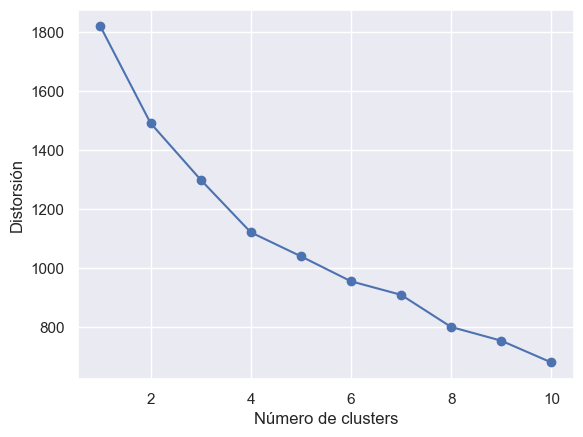

In [87]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

Como se puede ver en la gráfica no hay un número de clusters evidente, pero a partir del número 4 la distorsión empieza a reducirse de manera más lenta por lo que este puede ser un buen número de clusters para la implementación.

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 4)
kmeans.fit(df.iloc[:,:])
y_kmeans = kmeans.predict(df)
df['kmean'] = kmeans.labels_
df['kmean'].value_counts()

2    300
0    247
3    224
1    215
Name: kmean, dtype: int64

Se puede ver que la cantidad de empresas por cluster es parecida

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GRUPO EN NIIF', ylabel='VARIACION ACTIVOS'>

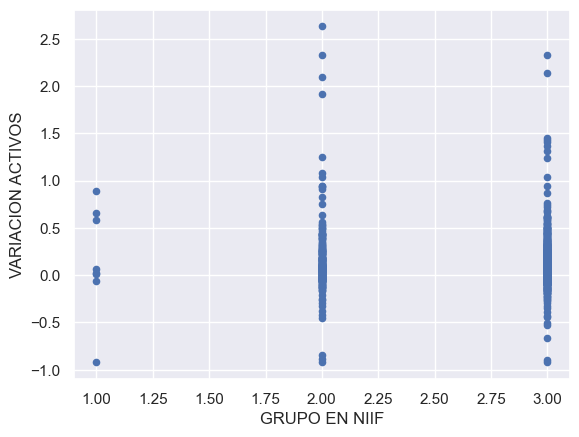

In [89]:
df.plot(kind='scatter', x='GRUPO EN NIIF', y = 'VARIACION ACTIVOS')

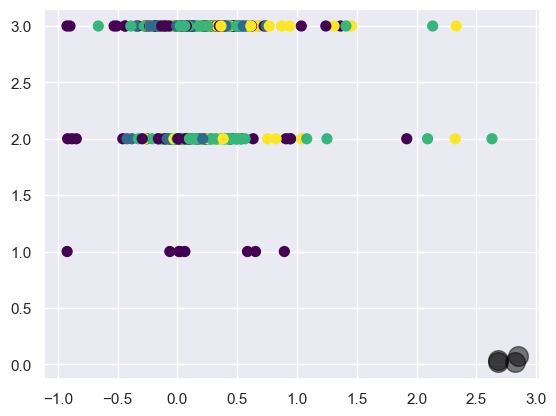

In [90]:
plt.scatter(df.iloc[:, -1].values, df.iloc[:, 0].values, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

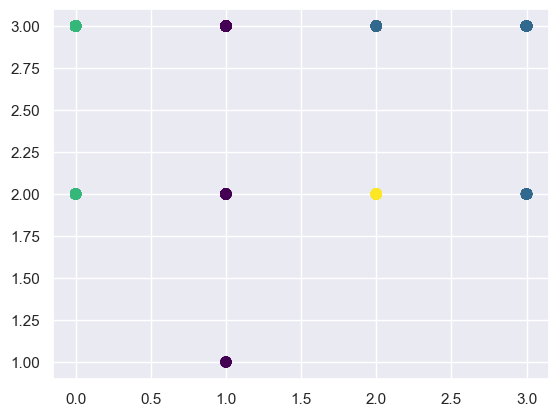

In [94]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(df, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(df.shape[0])[:n_clusters]
    df.to_numpy()
    centers = df.iloc[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(df, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([df[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(df, 4)
plt.scatter(df.iloc[:, -1].values, df.iloc[:, 0].values, c=labels,
            s=50, cmap='viridis')